In [2]:
path = '/content/drive/MyDrive/df_combined.csv'

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(path)

In [5]:
data.head()

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
0,M,CO,VH,B,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,L,FC,VH,B,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,L,FC,VH,B,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,S,CO,VH,B,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,L,FC,VH,A,100.0,100.0,100.0,78.3,97.4,97.7,95.6


#Regression problem

* deal with categorical columns with label encoder
* import necessary libraries
* use mlflow to track experiment
* use cross validation





In [6]:
cat_columns = ['Classification_Size', 'Classification_Focus', 'Research_Intensity', 'Status']

In [7]:
data[cat_columns[3]].value_counts()


A    2080
B     405
C      18
Name: Status, dtype: int64

##Visualizing the data

In [8]:
data.columns

Index(['Classification_Size', 'Classification_Focus', 'Research_Intensity',
       'Status', 'Academic_Reputation_Score', 'Employer_Reputation_Score',
       'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
       'International_Faculty_Score', 'International_Student_Score',
       'Overall_Score'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


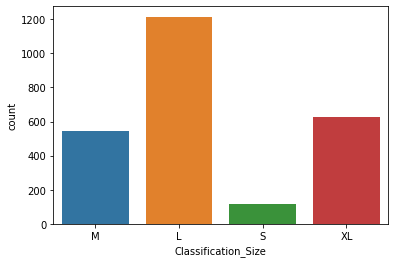

In [9]:
sns.countplot(data['Classification_Size'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


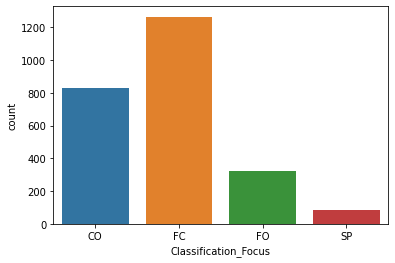

In [10]:
sns.countplot(data['Classification_Focus'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


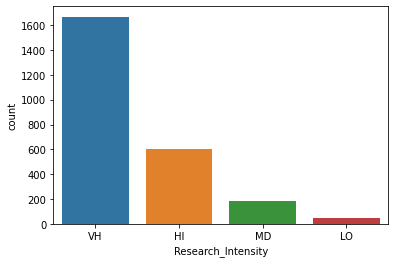

In [11]:
sns.countplot(data['Research_Intensity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


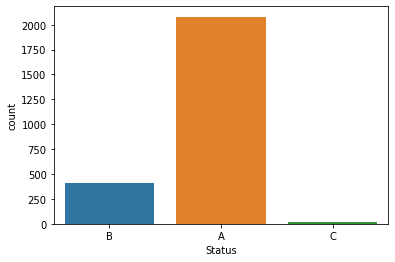

In [12]:
sns.countplot(data['Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


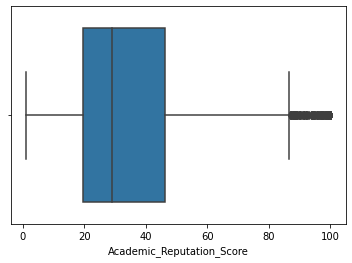

In [13]:
sns.boxplot(data['Academic_Reputation_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


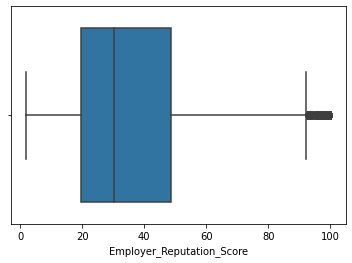

In [14]:
sns.boxplot(data['Employer_Reputation_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


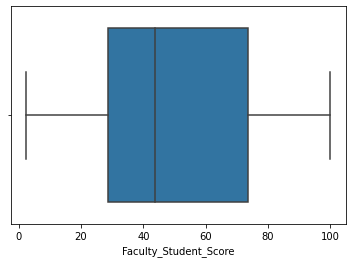

In [15]:
sns.boxplot(data['Faculty_Student_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


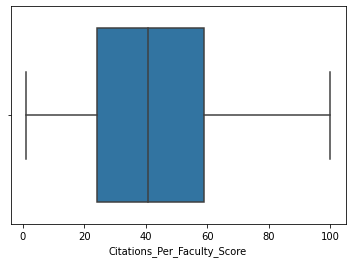

In [16]:
sns.boxplot(data['Citations_Per_Faculty_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


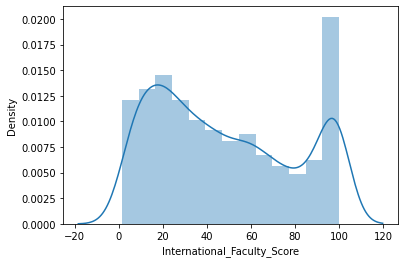

In [17]:
sns.distplot(data['International_Faculty_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


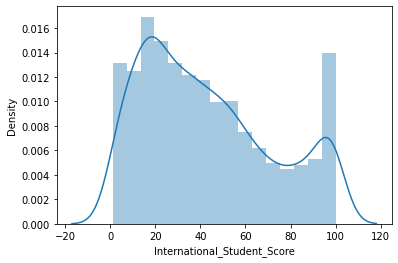

In [18]:
sns.distplot(data['International_Student_Score'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


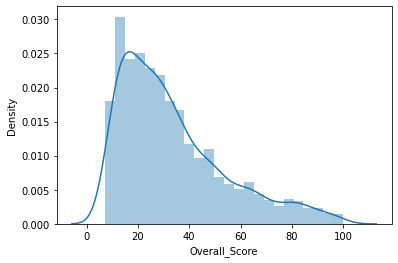

In [19]:
sns.distplot(data['Overall_Score'])

In [20]:
#'Faculty_Student_Score', 'Citations_Per_Faculty_Score',
#       'International_Faculty_Score', 'International_Student_Score',
#       'Overall_Score'

## dealing with categorical data

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
for i in cat_columns:
  data[i] = le.fit_transform(data[i])
  #score_mapping = dict(zip(le.classes_, range(len(le.classes_))))

#score_mapping

In [23]:
data.head()

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score,Overall_Score
0,1,0,3,1,100.0,100.0,100.0,99.9,100.0,96.1,100.0
1,0,1,3,1,100.0,100.0,100.0,99.4,99.6,72.7,98.7
2,0,1,3,1,100.0,100.0,98.3,99.9,96.5,75.2,98.4
3,2,0,3,1,99.5,85.4,100.0,100.0,93.4,89.2,97.7
4,0,1,3,0,100.0,100.0,100.0,78.3,97.4,97.7,95.6


In [24]:
data.shape

(2503, 11)

In [25]:
X = data.drop(columns='Overall_Score')
y = data['Overall_Score']

X.shape, y.shape

((2503, 10), (2503,))

##Scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
cols = list(X.columns)
cols

['Classification_Size',
 'Classification_Focus',
 'Research_Intensity',
 'Status',
 'Academic_Reputation_Score',
 'Employer_Reputation_Score',
 'Faculty_Student_Score',
 'Citations_Per_Faculty_Score',
 'International_Faculty_Score',
 'International_Student_Score']

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=cols)
X_df

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score
0,0.333333,0.000000,1.0,0.5,1.000000,1.000000,1.000000,0.998990,1.000000,0.960606
1,0.000000,0.333333,1.0,0.5,1.000000,1.000000,1.000000,0.993939,0.995947,0.724242
2,0.000000,0.333333,1.0,0.5,1.000000,1.000000,0.982600,0.998990,0.964539,0.749495
3,0.666667,0.000000,1.0,0.5,0.994944,0.851172,1.000000,1.000000,0.933131,0.890909
4,0.000000,0.333333,1.0,0.0,1.000000,1.000000,1.000000,0.780808,0.973658,0.976768
...,...,...,...,...,...,...,...,...,...,...
2498,0.000000,0.666667,1.0,0.0,0.341759,0.236493,0.271238,0.238384,0.122594,0.468687
2499,0.000000,0.666667,1.0,0.0,0.338726,0.253823,0.245650,0.280808,0.351570,0.016162
2500,1.000000,0.666667,1.0,0.0,0.311426,0.201835,0.328557,0.180808,0.433637,0.062626
2501,0.333333,0.000000,0.0,0.5,0.325581,0.168196,0.377687,0.211111,1.000000,0.400000


In [29]:
X

,Classification_Size,Classification_Focus,Research_Intensity,Status,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_Per_Faculty_Score,International_Faculty_Score,International_Student_Score
0,1,0,3,1,100.0,100.0,100.0,99.9,100.0,96.1
1,0,1,3,1,100.0,100.0,100.0,99.4,99.6,72.7
2,0,1,3,1,100.0,100.0,98.3,99.9,96.5,75.2
3,2,0,3,1,99.5,85.4,100.0,100.0,93.4,89.2
4,0,1,3,0,100.0,100.0,100.0,78.3,97.4,97.7
...,...,...,...,...,...,...,...,...,...,...
2498,0,2,3,0,34.9,25.1,28.8,24.6,13.4,47.4
2499,0,2,3,0,34.6,26.8,26.3,28.8,36.0,2.6
2500,3,2,3,0,31.9,21.7,34.4,18.9,44.1,7.2
2501,1,0,0,1,33.3,18.4,39.2,21.9,100.0,40.6


##Model Tracking

In [30]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

import mlflow

with mlflow.start_run(run_name="MLflow on Colab"):
  mlflow.log_metric("m1", 2.0)
  mlflow.log_param("p1", "mlflow-colab")

     |████████████████████████████████| 17.0 MB 5.3 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 209 kB 61.7 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 146 kB 41.0 MB/s 
     |████████████████████████████████| 596 kB 63.4 MB/s 
     |████████████████████████████████| 181 kB 63.1 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 745 kB 5.2 MB/s 


In [31]:
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


In [32]:
# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2DYHu1OBXcqPo44la9O1wyAJbMd_4zSm7Dc5jNh6xEGSWmjVE"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [33]:
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://7f27-35-237-102-225.ngrok.io


In [34]:
mlflow.set_experiment("uni_score")

2022/08/19 16:12:16 INFO mlflow.tracking.fluent: Experiment with name 'uni_score' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/1', experiment_id='1', lifecycle_stage='active', name='uni_score', tags={}>

##Model Evaluation

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=7)

In [37]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2002, 10), (2002,), (501, 10), (501,))

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)
lin_reg_pred = lin_reg.predict(test_X)

print(f'mse: {mean_squared_error(lin_reg_pred, test_y)}')
print(f'rmse: {mean_squared_error(lin_reg_pred, test_y, squared=False)}')
print(f'mae: {mean_absolute_error(lin_reg_pred, test_y)}')

mse: 80.99066949667677
rmse: 8.999481623775715
mae: 7.235813356855066


In [39]:
"""lin_svr = LinearSVR(tol=0.001, C=0.1)
lin_svr.fit(train_X, train_y)
lin_svr_pred = lin_svr.predict(test_X)

print(f'mse: {mean_squared_error(lin_svr_pred, test_y)}')
print(f'rmse: {mean_squared_error(lin_svr_pred, test_y, squared=False)}')
print(f'mae: {mean_absolute_error(lin_svr_pred, test_y)}')"""

"lin_svr = LinearSVR(tol=0.001, C=0.1)\nlin_svr.fit(train_X, train_y)\nlin_svr_pred = lin_svr.predict(test_X)\n\nprint(f'mse: {mean_squared_error(lin_svr_pred, test_y)}')\nprint(f'rmse: {mean_squared_error(lin_svr_pred, test_y, squared=False)}')\nprint(f'mae: {mean_absolute_error(lin_svr_pred, test_y)}')"

In [40]:
rf = RandomForestRegressor(n_estimators=1000, random_state=7, warm_start=False)
rf.fit(train_X, train_y)
rf_pred = rf.predict(test_X)

print(f'mse: {mean_squared_error(rf_pred, test_y)}')
print(f'rmse: {mean_squared_error(rf_pred, test_y, squared=False)}')
print(f'mae: {mean_absolute_error(rf_pred, test_y)}')

mse: 26.071189444471038
rmse: 5.105995441093836
mae: 3.4596918163672545


In [41]:
gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.006, random_state=7, tol=0.001)
gbr.fit(train_X, train_y)
gbr_pred = gbr.predict(test_X)

print(f'mse: {mean_squared_error(gbr_pred, test_y)}')
print(f'rmse: {mean_squared_error(gbr_pred, test_y, squared=False)}')
print(f'mae: {mean_absolute_error(gbr_pred, test_y)}')

mse: 33.235171206337796
rmse: 5.764995334459326
mae: 4.2636526683688025


In [42]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [43]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [45]:
cat = CatBoostRegressor(iterations=4000, learning_rate=0.01, depth=None, l2_leaf_reg=None, 
                        model_size_reg=None, rsm=None, loss_function='MAE', early_stopping_rounds=50,
                        random_state=7, verbose=False)
cat.fit(train_X, train_y)
cat_pred = cat.predict(test_X)

print(f'mse: {mean_squared_error(cat_pred, test_y)}')
print(f'rmse: {mean_squared_error(cat_pred, test_y, squared=False)}')
print(f'mae: {mean_absolute_error(cat_pred, test_y)}')

mse: 26.19586189836618
rmse: 5.118189318339659
mae: 3.4250339399368577


In [46]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.02, max_depth=10,
                        random_state=7, colsample_bylevel=0.7, scale_pos_weight=0.5,)
xgb.fit(train_X, train_y)
xgb_pred = xgb.predict(test_X)

print(f'mse: {mean_squared_error(xgb_pred, test_y)}')
print(f'rmse: {mean_squared_error(xgb_pred, test_y, squared=False)}')
print(f'mae: {mean_absolute_error(xgb_pred, test_y)}')

[16:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
mse: 24.288634830767933
rmse: 4.928350112438029
mae: 3.2118743171235042


In [47]:
from lightgbm import LGBMRegressor

In [48]:
lgb = LGBMRegressor(learning_rate=0.0176, n_estimators=3000, max_depth=-1, random_state=7,)
lgb.fit(train_X, train_y)
lgb_pred = lgb.predict(test_X)

print(f'mse: {mean_squared_error(lgb_pred, test_y)}')
print(f'rmse: {mean_squared_error(lgb_pred, test_y, squared=False)}')
print(f'mae: {mean_absolute_error(lgb_pred, test_y)}')

mse: 24.486999994363195
rmse: 4.948434095182353
mae: 3.296263262309079


In [49]:
with mlflow.start_run():

    param = {
       'learning_rate':0.0136, 
        'n_estimators':4000, 
        'max_depth':-1, 
        'random_state':7
    }
    
    mlflow.log_param("param", param)

    lgb = LGBMRegressor(**param)
    lgb.fit(train_X, train_y)
    lgb_pred = lgb.predict(test_X)

    
    mae = mean_absolute_error(test_y, lgb_pred)
    print(mae)
    mlflow.log_metric("mae", mae)

3.338699842634653


In [50]:
rf_score = []

fold = KFold(n_splits=7)

i=0
for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = XGBRegressor(n_estimators=4000, learning_rate=0.01, max_depth=10,
                        random_state=7, colsample_bylevel=0.7, scale_pos_weight=0.5)

  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=200,eval_metric='mae', verbose=False)
  preds = model.predict(X_test)

  score = mean_absolute_error(y_test, preds)
  print(f'fold {i}: {score}')
  i += 1

  rf_score.append(score)
print(np.mean(rf_score))

[16:13:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold 0: 3.815844070178836
[16:14:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold 1: 2.9257512348324224
[16:14:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold 2: 3.0164796999712897
[16:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold 3: 5.151387529799392
[16:14:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold 4: 3.9813899123034227
[16:15:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
fold 5: 3.5273427380901086
[16:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear

In [51]:
data.shape

(2503, 11)

In [58]:
rf_score = []

fold = KFold(n_splits=7)

i=0
for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = LGBMRegressor(learning_rate=0.07, n_estimators=4000, max_depth=20, random_state=7,)

  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=200,eval_metric='mae', verbose=False)
  preds = model.predict(X_test)

  score = mean_absolute_error(y_test, preds)
  print(f'fold {i}: {score}')
  i += 1

  rf_score.append(score)
print(np.mean(rf_score))

fold 0: 3.9641433289223826
fold 1: 3.084404827450216
fold 2: 3.2682742502849282
fold 3: 7.537232847674258
fold 4: 4.200878482015747
fold 5: 3.7699967973854
fold 6: 5.7642967915828525
4.512746760759398


In [59]:
tat_score = []

fold = KFold(n_splits=7)

i=0
for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = RandomForestRegressor(n_estimators=4000, max_depth=15, verbose=False, random_state=7,n_jobs=-1)

  model.fit(X_train, y_train)
  preds = model.predict(X_test)

  score = mean_absolute_error(y_test, preds)
  print(f'fold {i}: {score}')
  i += 1

  tat_score.append(score)
print(np.mean(tat_score))

fold 0: 4.443805389670589
fold 1: 3.044881545150204
fold 2: 3.2273501971484566
fold 3: 8.781232513252995
fold 4: 4.251887992847552
fold 5: 3.7247059446570727
fold 6: 6.342755168075746
4.8309455358289455


In [63]:
asd_score = []

fold = KFold(n_splits=7)

i=0
for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = CatBoostRegressor(iterations=4000, learning_rate=0.01, depth=None, l2_leaf_reg=None, 
                        model_size_reg=None, rsm=None, loss_function='MAE', early_stopping_rounds=50,
                        random_state=7,)

  model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=200, verbose=False)
  preds = model.predict(X_test)

  score = mean_absolute_error(y_test, preds)
  print(f'fold {i}: {score}')
  i += 1

  asd_score.append(score)
print(np.mean(asd_score))

fold 0: 4.110145155308608
fold 1: 3.260577954122377
fold 2: 3.948330456501675
fold 3: 8.824350135185083
fold 4: 4.175521732261441
fold 5: 3.4212628263629083
fold 6: 7.572567355976046
5.04467937367402


In [ ]:
wer_score = []

fold = KFold(n_splits=7)

i=0
for train_index, test_index in fold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model = GradientBoostingRegressor(n_estimators=4000, learning_rate=0.09, random_state=7, tol=0.001, max_depth=10)

  model.fit(X_train, y_train,)
  preds = model.predict(X_test)

  score = mean_absolute_error(y_test, preds)
  print(f'fold {i}: {score}')
  i += 1

  wer_score.append(score)
print(np.mean(wer_score))

fold 0: 4.67045153059981
